#        Medical Cost Prediction(Healthcare Domain)


### Business/Domain Understanding


### What is Insurance?
#### Insurance is a contract between two parties whereby one party agrees to undertake the risk of the other in exchange for consideration known as premium and promises to indemnify the party on the happening of an uncertain event. 


### What is health insurance?
- A plan that covers or shares the expenses associated with health care can be described as health insurance.

-  Health insurance in India is an emerging insurance sector after the term life insurance and automobile insurance sector. Rise in the middle class, higher hospitalization cost, expensive health care, digitization and increase in awareness level are some important drivers for the growth of the health insurance market in India.


### Problem Statement:
-  The aim here will be to predict the medical costs billed by health insurance on an individual given some features about the individual in the dataset.



#### Medical Cost Dataset


#### Import the required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


### Steps to be followed
#### Step - 1: Load the data and perform the basic EDA to understand the data.


In [25]:
df = pd.read_csv('Insurance.csv')
df.drop(['Unnamed: 0'],axis =1,inplace = True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1100,52,female,44.700,3,no,southwest,11411.68500
1101,50,male,30.970,3,no,northwest,10600.54830
1102,18,female,31.920,0,no,northeast,2205.98080
1103,18,female,36.850,0,no,southeast,1629.83350


### Exploratory Data Analysis
- Univariate Analysis
- Bivariate Analysis
- Missing Values
- Outliers


### Columns/Features/Property/Dimensions
- age: age of primary beneficiary
- sex: insurance contractor gender, female, male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,     objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- children: Number of dependents
- smoker: Smoking
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: Individual medical costs billed by health insurance



In [26]:
df.shape

(1105, 7)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105 entries, 0 to 1104
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1105 non-null   int64  
 1   sex       1105 non-null   object 
 2   bmi       1105 non-null   float64
 3   children  1105 non-null   int64  
 4   smoker    1105 non-null   object 
 5   region    1105 non-null   object 
 6   charges   1105 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 60.6+ KB


In [28]:
df.describe()

,age,bmi,children,charges
count,1105.000000,1105.000000,1105.000000,1105.000000
mean,38.455204,29.954050,1.072398,8627.360139
std,13.869606,5.817522,1.214424,5469.290410
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,25.745000,0.000000,4151.028700
50%,38.000000,29.735000,1.000000,7729.645750
75%,50.000000,33.820000,2.000000,11931.125250
max,64.000000,45.430000,5.000000,23568.272000


In [29]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [30]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1100,52,female,44.70,3,no,southwest,11411.6850
1101,50,male,30.97,3,no,northwest,10600.5483
1102,18,female,31.92,0,no,northeast,2205.9808
1103,18,female,36.85,0,no,southeast,1629.8335
1104,21,female,25.80,0,no,southwest,2007.9450


In [31]:
df.isna()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1100,False,False,False,False,False,False,False
1101,False,False,False,False,False,False,False
1102,False,False,False,False,False,False,False
1103,False,False,False,False,False,False,False


In [32]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [33]:
df.value_counts(normalize=True)

age  sex     bmi     children  smoker  region     charges    
19   male    30.590  0         no      northwest  1639.56310     0.001810
18   female  20.790  0         no      southeast  1607.51010     0.000905
46   male    33.345  1         no      northeast  8334.45755     0.000905
             26.620  1         no      southeast  7742.10980     0.000905
             25.800  5         no      southwest  10096.97000    0.000905
                                                                   ...   
30   male    24.400  3         yes     southwest  18259.21600    0.000905
             25.460  0         no      northeast  3645.08940     0.000905
             27.645  1         no      northeast  4237.12655     0.000905
             28.690  3         yes     northwest  20745.98910    0.000905
64   male    40.480  0         no      southeast  13831.11520    0.000905
Length: 1104, dtype: float64

In [34]:
df.nunique()

age           47
sex            2
bmi          497
children       6
smoker         2
region         4
charges     1104
dtype: int64

In [35]:
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [36]:
df.mean().to_frame().T

,age,bmi,children,charges
0,38.455204,29.95405,1.072398,8627.360139


In [37]:
df.median().to_frame().T

,age,bmi,children,charges
0,38.0,29.735,1.0,7729.64575


In [38]:
df.std().to_frame().T

,age,bmi,children,charges
0,13.869606,5.817522,1.214424,5469.29041


In [39]:
df.skew().to_frame().T

,age,bmi,children,charges
0,0.122156,0.170101,1.019347,0.731138


In [40]:
df.var().to_frame().T

,age,bmi,children,charges
0,192.365972,33.843563,1.474826,2.991314e+07


In [41]:
num = df.select_dtypes(include = 'number').columns
num

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [43]:
cat = df.select_dtypes(exclude = 'number').columns
cat

Index(['sex', 'smoker', 'region'], dtype='object')

In [57]:
df['bmi'].describe()

count    1105.000000
mean       29.954050
std         5.817522
min        15.960000
25%        25.745000
50%        29.735000
75%        33.820000
max        45.430000
Name: bmi, dtype: float64

In [53]:
df['charges'].describe()

count     1105.000000
mean      8627.360139
std       5469.290410
min       1121.873900
25%       4151.028700
50%       7729.645750
75%      11931.125250
max      23568.272000
Name: charges, dtype: float64

In [58]:
df['age'].describe()

count    1105.000000
mean       38.455204
std        13.869606
min        18.000000
25%        26.000000
50%        38.000000
75%        50.000000
max        64.000000
Name: age, dtype: float64

In [60]:
df['children'].describe()

count    1105.000000
mean        1.072398
std         1.214424
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

### Inter Quartile Range(IQR):
-Inter Quartile Range : iqr = q3-q1

-lb = q1 - 1.5*iqr

-ub = q3 - 1.5*iqr

In [46]:
q1 = df['bmi'].quantile(0.25)
q3 = df['bmi'].quantile(0.75)

iqr = q3 - q1
lb = q1 - (1.5*iqr)

ub = q3 + (1.5*iqr)


Outliers = df[(df['bmi'] < lb) | (df['bmi'] > ub)].index
Outliers

Int64Index([], dtype='int64')

In [48]:
df.drop(Outliers,inplace=True)

In [49]:
q1 = df['charges'].quantile(0.25)
q3 = df['charges'].quantile(0.75)

iqr = q3 - q1
lb = q1 - (1.5*iqr)

ub = q3 + (1.5*iqr)


Outliers = df[(df['charges'] < lb) | (df['charges'] > ub)].index
Outliers

Int64Index([], dtype='int64')

In [50]:
df.drop(Outliers,inplace= True)

### Detection of outliers

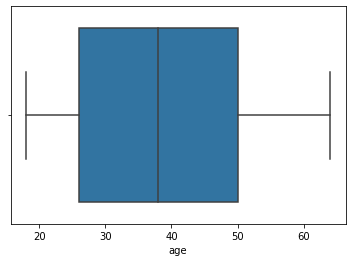

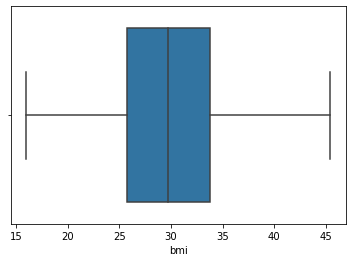

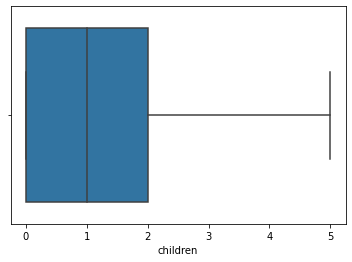

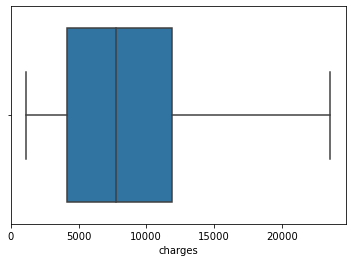

In [45]:
for i in num:
    sns.boxplot(df[i])
    plt.show()

In [61]:
df.groupby('smoker')['age'].mean()

smoker
no     39.005935
yes    32.531915
Name: age, dtype: float64

In [62]:
df.groupby('sex')['age','children'].mean()

,age,children
sex,,
female,38.688496,1.061947
male,38.211111,1.083333


In [63]:
df.to_csv('Insurance.csv')

In [65]:
df = pd.read_csv('Insurance.csv')
df.drop(['Unnamed: 0'],axis =1,inplace = True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1100,52,female,44.700,3,no,southwest,11411.68500
1101,50,male,30.970,3,no,northwest,10600.54830
1102,18,female,31.920,0,no,northeast,2205.98080
1103,18,female,36.850,0,no,southeast,1629.83350


### Univariant Analysis

#### Numerical

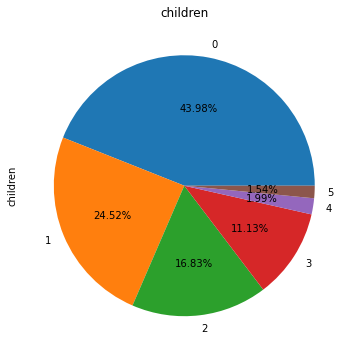

In [67]:
plt.figure(figsize=(7,6))
df["children"].value_counts().plot.pie(autopct="%.2f%%")
plt.title("children")
plt.show()

#### Observation: This plot shows that very less percent has 3 childrens (11.13%).

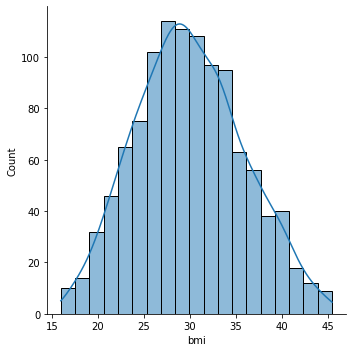

In [68]:
sns.displot(df['bmi'],kde = True)
plt.show()

#### Observation: The count of body mass index is high that ranges between 20-40. 

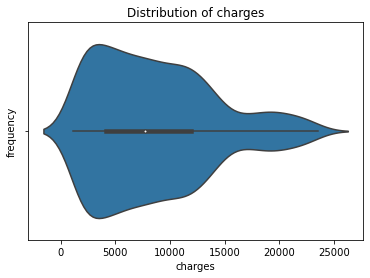

In [226]:
plt.title('Distribution of charges')
plt.ylabel("frequency")
sns.violinplot(df['charges'])
plt.show()

#### Observation: The frequency of charges ranges between 2000 - 22000.

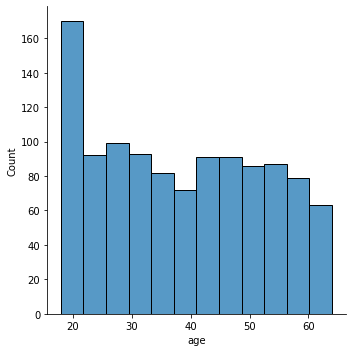

In [71]:
sns.displot(df['age'], kind = 'hist')
plt.show()

#### Observation: This plot shows that age of 20 has more number of count.

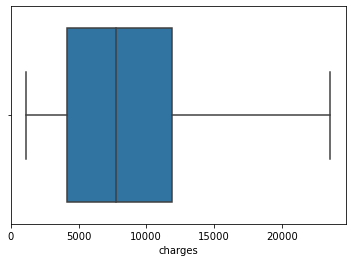

In [72]:
sns.boxplot(df['charges'])
plt.show()

#### Observation: This shows that charges has no outliers in boxplot.

#### Categorical

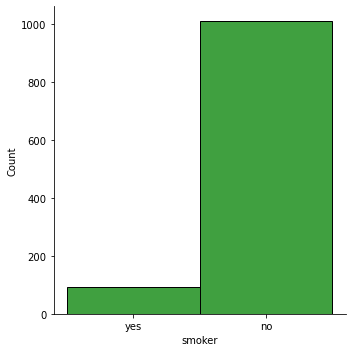

In [73]:
sns.displot(df['smoker'],kind= 'hist',color = 'green')
plt.show()

#### Observation: In this plot smoker (yes) has less count and smoker(no) has more count.


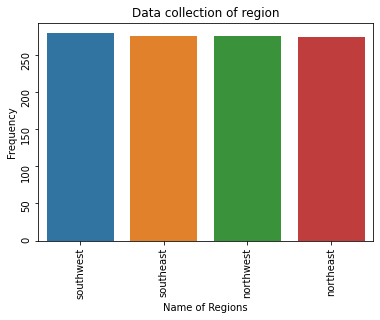

In [75]:
sns.countplot(x = 'region',data = df)
plt.title('Data collection of region')
plt.xlabel('Name of Regions')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.yticks(rotation = 90)
plt.show()

#### Observation: Countplot shows that all the region has same frequency.

### Bivariate Analysis

#### Numerical-Numerical

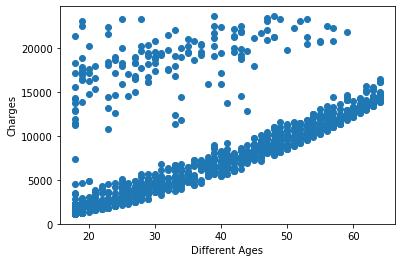

In [77]:
plt.scatter(df['age'],df['charges'])
plt.xlabel('Different Ages')
plt.ylabel('Charges')
plt.show()

#### Observation: Scatter plot shows that as age increases the charges also increases.

In [78]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.148635,0.032943,0.516150
bmi,0.148635,1.000000,-0.010678,-0.056630
children,0.032943,-0.010678,1.000000,0.113358
charges,0.516150,-0.056630,0.113358,1.000000


(<AxesSubplot:>,)

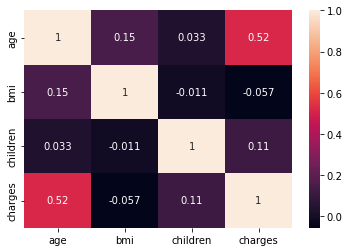

In [79]:
cor = df.corr()
sns.heatmap(cor,annot = True)

#### Observation: There is a positive correlation between age and charges because as age increases, charges also increases.

#### Numerical- Categorical

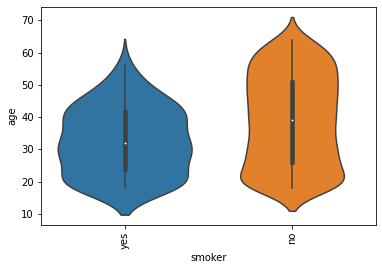

In [88]:
sns.violinplot(x= df['smoker'],y= df['age'],data = df)
plt.xticks(rotation=90)
plt.show()

### Observation: No smokers have more count of age than Yes smokers.

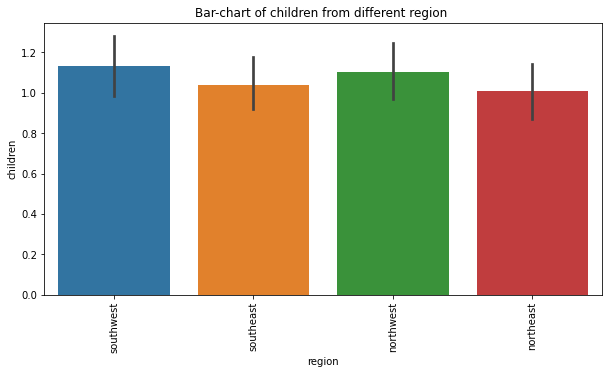

In [81]:
plt.figure(figsize =(10,5))
sns.barplot(x = 'region',y = 'children', data = df)
plt.title("Bar-chart of children from different region ")
plt.xticks(rotation = 90)
plt.show()

#### Observation: This barplot shows that region southwest has more number of children.

#### Categorical-Categorical

<Figure size 1440x1080 with 0 Axes>

<Figure size 1080x576 with 0 Axes>

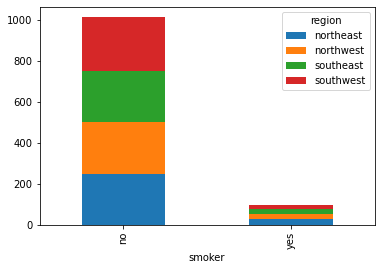

In [83]:
crosstab = pd.crosstab(df['smoker'],df['region'])
plt.figure(figsize =(20,15))
plt.figure(figsize = (15,8))
crosstab.plot(kind = 'bar',stacked = True)
plt.show()

#### Observation: This plot shows that all the region has same count in 'No smoker' and all the region has same count in 'Yes smoker'.

### Multivariate Analysis

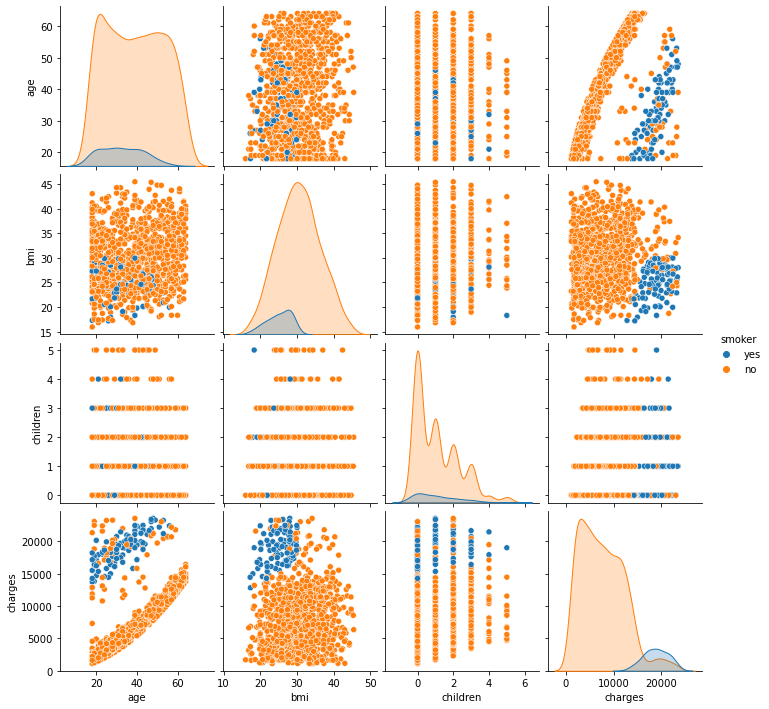

In [89]:
sns.pairplot(data=df,hue='smoker')
plt.show()


<Figure size 14400x9000 with 0 Axes>

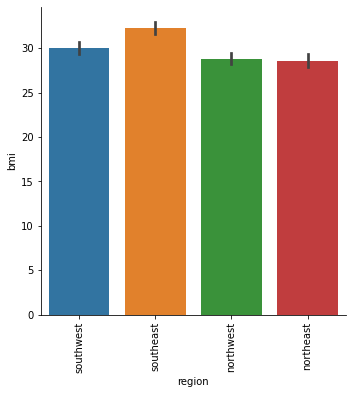

In [86]:
plt.figure(figsize=(200,125))
sns.catplot(x = 'region',y = 'bmi',data = df, kind = 'bar')
plt.xticks(rotation = 90)
plt.show()

#### Observation: From Region southeast has more weight of body mass index compare to others.

### Step - 2: Document the below mentioned points properly: 
- Identify the input and output/target variables. 
- Identify the type of ML Task.
- Identify the Evaluation Metric.
- For regression task - Mean Absolute Error
- For classification task - Accuracy


In [90]:
y=df['charges']
X=df[['age','sex','bmi','children','smoker','region']]


In [92]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [93]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


### Step - 3: Split the dataset into Training and Testing (recommended 75:25 split).

In [95]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.75, random_state = 100)

print(X_train.shape,y_train.shape)

print(X_test.shape,y_test.shape)

(828, 6) (828,)
(277, 6) (277,)


In [96]:
X_train.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
dtype: object

### Step - 4: Data preparation on train data:
- For Numerical Variables - Standardization or Normalization (Fit and Transform)
- For Categorical - LabelEncoding or OneHotEncoding (Choose wisely)


### Separation of Categorical & Numerical feature on X_train data

In [99]:
X_train_cat = X_train.select_dtypes(include = ['object'])

X_train_cat.head()

,sex,smoker,region
487,male,no,northwest
666,male,no,southeast
413,male,no,northeast
614,female,no,southwest
542,male,no,northwest


In [109]:
X_train_cat.describe()

,sex,smoker,region
count,828,828,828
unique,2,2,4
top,female,no,northeast
freq,434,762,214


In [100]:
X_train_num = X_train.select_dtypes(include=['int64','float64'])

X_train_num.head()

,age,bmi,children
487,47,19.570,1
666,23,26.510,0
413,43,26.030,0
614,47,36.000,1
542,27,33.155,2


In [103]:
X_train_num.describe()

,age,bmi,children
count,828.000000,828.000000,828.000000
mean,38.693237,29.848877,1.054348
std,13.794225,5.956991,1.205868
min,18.000000,15.960000,0.000000
25%,27.000000,25.588750,0.000000
50%,38.000000,29.735000,1.000000
75%,50.000000,33.820000,2.000000
max,64.000000,45.320000,5.000000


### Scaling the numerical features on X_train

In [101]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num),
                                   columns = X_train_num.columns,
                                   index = X_train_num.index)

X_train_num_rescaled.head()

,age,bmi,children
487,0.602555,-1.726558,-0.045097
666,-1.138355,-0.560836,-0.874876
413,0.312404,-0.641462,-0.874876
614,0.602555,1.033213,-0.045097
542,-0.848203,0.555334,0.784683


In [102]:
X_train_num_rescaled.describe()

,age,bmi,children
count,8.280000e+02,8.280000e+02,8.280000e+02
mean,-4.625929e-17,9.184816e-17,7.508755e-18
std,1.000604e+00,1.000604e+00,1.000604e+00
min,-1.501044e+00,-2.332935e+00,-8.748764e-01
25%,-8.482031e-01,-7.155797e-01,-8.748764e-01
50%,-5.028595e-02,-1.912805e-02,-4.509672e-02
75%,8.201691e-01,6.670353e-01,7.846830e-01
max,1.835700e+00,2.598707e+00,3.274022e+00


### Applying OneHotEncoding on Categorical Columns on X_train

In [108]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop ='first', sparse = False)

X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat),
                              columns = encoder.get_feature_names_out(X_train_cat.columns),
                              index = X_train_cat.index) 

X_train_cat_ohe.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
487,1.0,0.0,1.0,0.0,0.0
666,1.0,0.0,0.0,1.0,0.0
413,1.0,0.0,0.0,0.0,0.0
614,0.0,0.0,0.0,0.0,1.0
542,1.0,0.0,1.0,0.0,0.0


In [110]:
X_train_cat_ohe.describe()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,828.000000,828.000000,828.000000,828.000000,828.000000
mean,0.475845,0.079710,0.245169,0.250000,0.246377
std,0.499718,0.271008,0.430447,0.433274,0.431161
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.250000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


###  Concatinating the Encoded Categorical Features and Rescaled Numerical Features for X_train

In [107]:
X_train_transformed = pd.concat([X_train_num_rescaled,X_train_cat_ohe],axis = 1)

X_train_transformed.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
487,0.602555,-1.726558,-0.045097,1.0,0.0,1.0,0.0,0.0
666,-1.138355,-0.560836,-0.874876,1.0,0.0,0.0,1.0,0.0
413,0.312404,-0.641462,-0.874876,1.0,0.0,0.0,0.0,0.0
614,0.602555,1.033213,-0.045097,0.0,0.0,0.0,0.0,1.0
542,-0.848203,0.555334,0.784683,1.0,0.0,1.0,0.0,0.0


### Step - 5: Data preparation on test data:
- For Numerical Variables - Standardization (Transform)
- For Categorical - LabelEncoding or OneHotEncoding (Choose wisely)


### Separation of Categorical & Numerical feature on X_test data

In [111]:
X_test_cat = X_test.select_dtypes(include = ['object'])

X_test_cat.head()

,sex,smoker,region
877,female,no,southwest
602,female,no,southwest
1003,female,no,northwest
378,female,no,southeast
581,male,no,southeast


In [112]:
X_test_cat.describe()

,sex,smoker,region
count,277,277,277
unique,2,2,4
top,male,no,southwest
freq,146,249,75


In [113]:
X_test_num = X_test.select_dtypes(include=['int64','float64'])

X_test_num.head()

,age,bmi,children
877,29,25.600,4
602,24,30.100,3
1003,27,31.255,1
378,49,36.630,3
581,18,35.200,1


In [114]:
X_test_num.describe()

,age,bmi,children
count,277.000000,277.000000,277.000000
mean,37.743682,30.268430,1.126354
std,14.093734,5.377102,1.240292
min,18.000000,16.815000,0.000000
25%,25.000000,26.600000,0.000000
50%,38.000000,29.700000,1.000000
75%,49.000000,33.725000,2.000000
max,64.000000,45.430000,5.000000


### Scaling the numerical features on X_test

In [115]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num),
                                   columns = X_test_num.columns,
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,age,bmi,children
877,-0.703127,-0.713690,2.444242
602,-1.065817,0.042182,1.614463
1003,-0.848203,0.236189,-0.045097
378,0.747631,1.139035,1.614463
581,-1.501044,0.898836,-0.045097


In [116]:
X_test_num_rescaled.describe()

,age,bmi,children
count,277.000000,277.000000,277.000000
mean,-0.068879,0.070473,0.059749
std,1.022330,0.903200,1.029169
min,-1.501044,-2.189319,-0.874876
25%,-0.993279,-0.545719,-0.874876
50%,-0.050286,-0.025007,-0.045097
75%,0.747631,0.651078,0.784683
max,1.835700,2.617184,3.274022


### Applying OneHotEncoding on Categorical Columns on X_test

In [118]:
X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat),
                              columns = encoder.get_feature_names_out(X_test_cat.columns),
                              index = X_test_cat.index) 

X_test_cat_ohe.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
877,0.0,0.0,0.0,0.0,1.0
602,0.0,0.0,0.0,0.0,1.0
1003,0.0,0.0,1.0,0.0,0.0
378,0.0,0.0,0.0,1.0,0.0
581,1.0,0.0,0.0,1.0,0.0


In [119]:
X_test_cat_ohe.describe()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,277.000000,277.000000,277.000000,277.000000,277.000000
mean,0.527076,0.101083,0.263538,0.249097,0.270758
std,0.500170,0.301984,0.441349,0.433273,0.445156
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


### Concatinating the Encoded Categorical Features and Rescaled Numerical Features for X_test

In [120]:
X_test_transformed = pd.concat([X_test_num_rescaled,X_test_cat_ohe],axis = 1)

X_test_transformed.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
877,-0.703127,-0.713690,2.444242,0.0,0.0,0.0,0.0,1.0
602,-1.065817,0.042182,1.614463,0.0,0.0,0.0,0.0,1.0
1003,-0.848203,0.236189,-0.045097,0.0,0.0,1.0,0.0,0.0
378,0.747631,1.139035,1.614463,0.0,0.0,0.0,1.0,0.0
581,-1.501044,0.898836,-0.045097,1.0,0.0,0.0,1.0,0.0


### Problem:
- Target variable: Charges
- Historical available ? Yes
- Type: Supervised Learning
- Continous Numerical feature    
- Task : Regression     

### Step-6: Model Training Phase - Use all the algorithms mentioned below to train separate models:
- Linear Regression
- KNN
- Support Vector Machines
- Decision Trees
- Random Forest

### Step - 7: Predict and evaluate each model separately using the correct evaluation metric.

### Step - 8: Display a plot which shows all the algorithms applied along with the scores achieved.


### Training- Linear Regression

In [223]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_transformed,y_train)

LinearRegression()

### Prediction

In [224]:
y_test_pred = regressor.predict(X_test_transformed)

### Evaluation

In [225]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_test_pred)

1559.2248297238907

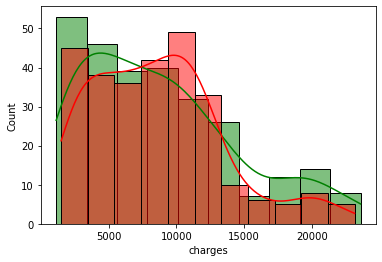

In [210]:
sns.histplot(y_test,color = 'green',alpha = 0.5,kde =True)
sns.histplot(y_test_pred,color = 'red',alpha = 0.5,kde = True)
plt.show()

### Training- KNeighbors Regression

In [222]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed,y_train)

y_test_pred = regressor.predict(X_test_transformed)

from sklearn import metrics
metrics.mean_absolute_error(y_test,y_test_pred)

2240.7913134288815

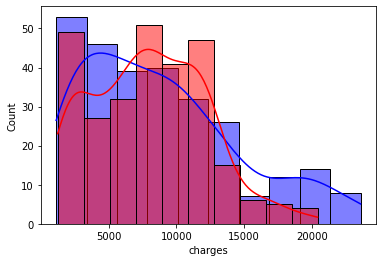

In [212]:
sns.histplot(y_test,color = 'blue',kde =True)
sns.histplot(y_test_pred,color = 'red',kde = True)
plt.show()

### Training- Support Vector Regression

In [221]:
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(X_train_transformed,y_train)

y_test_pred = regressor.predict(X_test_transformed)

from sklearn import metrics
metrics.mean_absolute_error(y_test,y_test_pred)

4555.766490600006

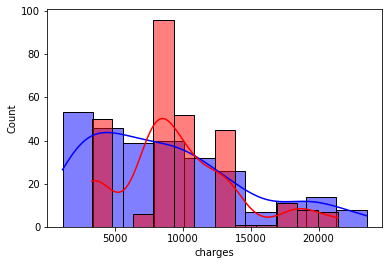

In [202]:
sns.histplot(y_test,color = 'blue',alpha = 0.5,kde = True)
sns.histplot(y_test_pred,color = 'red',alpha = 0.5,kde = True)
plt.show()

### Training- Decision Tree

In [220]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed,y_train)

y_test_pred = regressor.predict(X_test_transformed)

from sklearn import metrics
metrics.mean_absolute_error(y_test,y_test_pred)

1732.815241296029

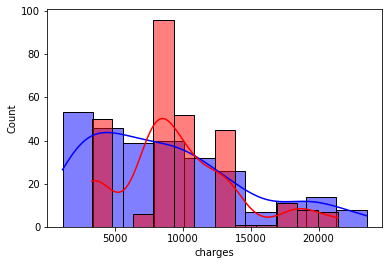

In [203]:
sns.histplot(y_test,color = 'blue',alpha = 0.5,kde = True)
sns.histplot(y_test_pred,color = 'red',alpha = 0.5,kde = True)
plt.show()

### Training- Random Forest Regression

In [217]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_transformed,y_train)

y_test_pred = regressor.predict(X_test_transformed)

from sklearn import metrics
metrics.mean_absolute_error(y_test,y_test_pred)

1620.076937732059

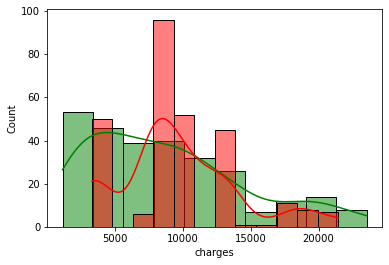

In [204]:
sns.histplot(y_test,color = 'green',alpha = 0.5,kde = True)
sns.histplot(y_test_pred,color = 'red',alpha = 0.5,kde = True)
plt.show()

### Training- Adaptive Boost Regression

In [218]:
from sklearn.ensemble import AdaBoostRegressor
regressor = AdaBoostRegressor()
regressor.fit(X_train_transformed,y_train)

y_test_pred = regressor.predict(X_test_transformed)

from sklearn import metrics
metrics.mean_absolute_error(y_test,y_test_pred)

2918.8482446880184

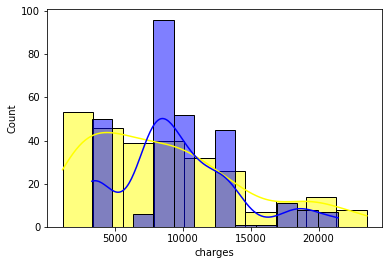

In [205]:
sns.histplot(y_test,color = 'yellow',alpha = 0.5,kde = True)
sns.histplot(y_test_pred,color = 'blue',alpha = 0.5,kde = True)
plt.show()

### Training - Gradient Boosting Regression

In [219]:
from sklearn.ensemble import GradientBoostingRegressor
regressor =GradientBoostingRegressor()
regressor.fit(X_train_transformed,y_train)

y_test_pred = regressor.predict(X_test_transformed)

from sklearn import metrics
metrics.mean_absolute_error(y_test,y_test_pred)

1483.6141592728152

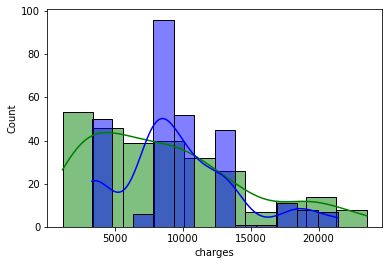

In [206]:
sns.histplot(y_test,color = 'green',alpha = 0.5,kde = True)
sns.histplot(y_test_pred,color = 'blue',alpha = 0.5,kde = True)
plt.show()

### Observation:
- Linear Regression: metrics.mean_absolute_error(y_test,y_test_pred) = 1559.2248297238907
- KNN: metrics.mean_absolute_error(y_test,y_test_pred) = 2240.7913134288815
- Support Vector Regression: metrics.mean_absolute_error(y_test,y_test_pred) = 4555.766490600006
- Decision Trees: metrics.mean_absolute_error(y_test,y_test_pred) = 1732.815241296029
- Random Forest : metrics.mean_absolute_error(y_test,y_test_pred) = 1620.076937732059
- Adaptive Boost Regression: metrics.mean_absolute_error(y_test,y_test_pred) = 2918.8482446880184
- Gradient Boosting Regression: metrics.mean_absolute_error(y_test,y_test_pred) = 1483.6141592728152


### Write your conclusion on the best algorithm for the Medical Cost Prediction problem.



### Conclusion:
- Gradient Boosting Decision Tree Regression algorithm is the best model for Medical cost prediction
- Compare to other algorithm mean_absolute_error(y_test,y_test_pred) of GBDT is less (1483.6141592728152)